<a href="https://colab.research.google.com/github/MohammadErfanRashidi/weather-forecasting/blob/main/WeatherForcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [97]:
# Uploading the dataset
df = pd.read_csv('/content/DailyDelhiClimateTrain.csv')

In [98]:
# Head
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [99]:
# Describe the dataset
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [100]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [101]:
# plotting meantemp
fig = px.line(df, x='date', y='meantemp', title='Mean Temperature Over Time')
fig.show()

In [102]:
# Plotting humidity
fig = px.line(df, x='date', y='humidity', title='Humidity Over Time')
fig.show()

In [103]:
# Plotting wind_speed
fig = px.line(df, x='date', y='wind_speed', title='Wind Speed Over Time')
fig.show()

In [104]:
# Plotting meantemp and humidity relationship
figure = px.scatter(data_frame = df, x="humidity",
                    y="meantemp", size="meantemp",
                    trendline="ols",
                    title = "Relationship Between Temperature and Humidity")
figure.show()

<Axes: >

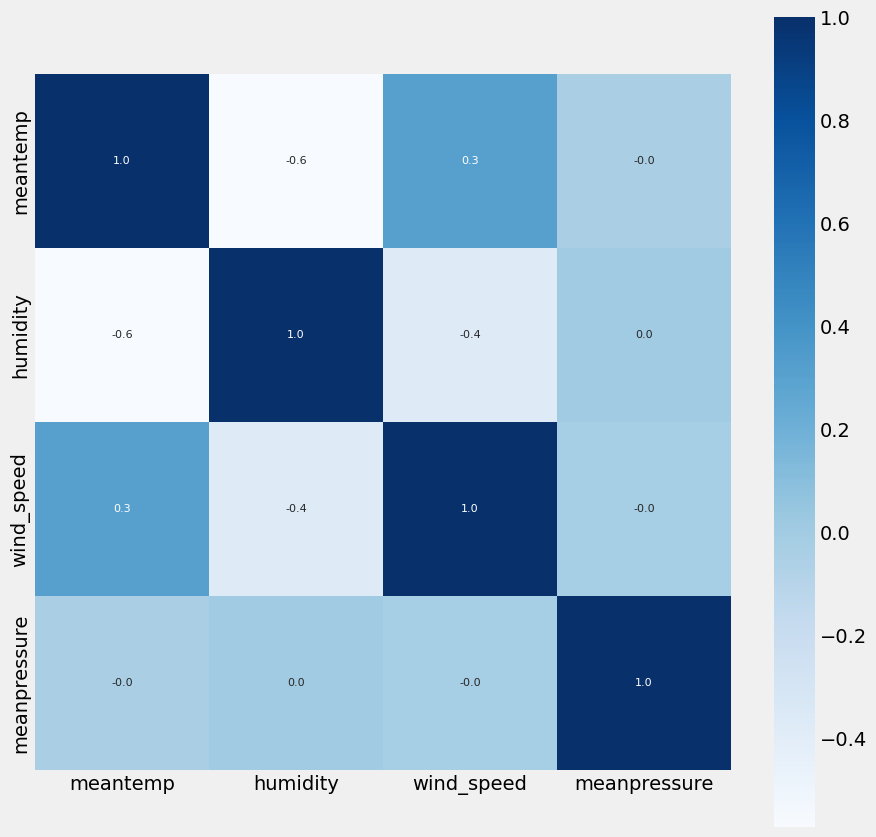

In [105]:
# Heatmap
df_heatmap = df.drop('date', axis=1)
correlation = df_heatmap.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [106]:
# Extracting date
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [107]:
# Head
df.head()

,date,meantemp,humidity,wind_speed,meanpressure,year,month,day
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1,2
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1,3
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1,4
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1,5


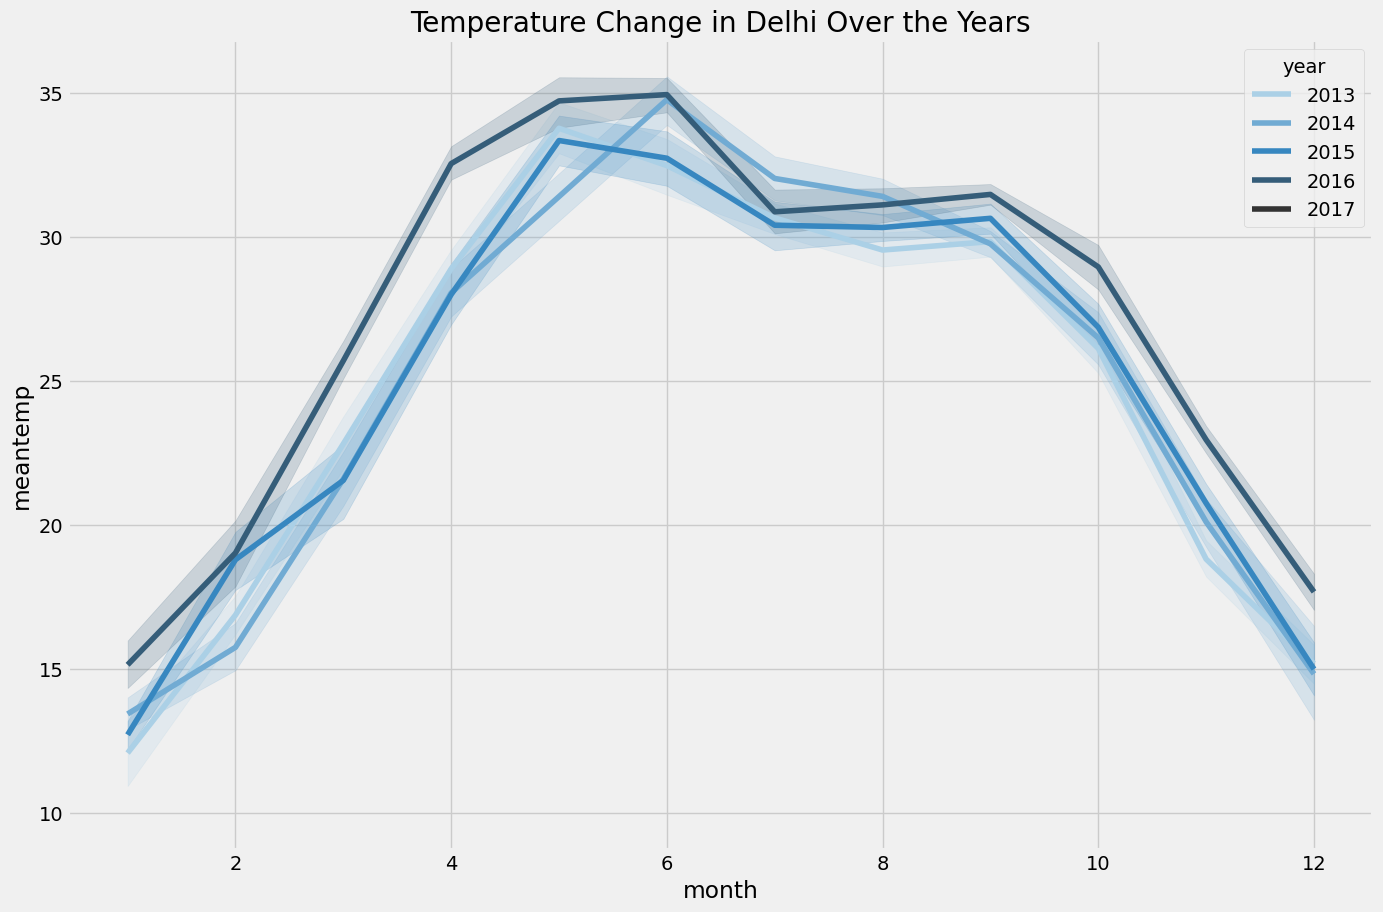

In [108]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.title("Temperature Change in Delhi Over the Years")
sns.lineplot(data = df, x='month', y='meantemp', hue='year', palette='Blues_d')
plt.show()

In [109]:
# Converting time data
forecast_data = df.rename(columns = {"date": "ds",
                                       "meantemp": "y"})
print(forecast_data)

             ds          y    humidity  wind_speed  meanpressure  year  month  \
0    2013-01-01  10.000000   84.500000    0.000000   1015.666667  2013      1   
1    2013-01-02   7.400000   92.000000    2.980000   1017.800000  2013      1   
2    2013-01-03   7.166667   87.000000    4.633333   1018.666667  2013      1   
3    2013-01-04   8.666667   71.333333    1.233333   1017.166667  2013      1   
4    2013-01-05   6.000000   86.833333    3.700000   1016.500000  2013      1   
...         ...        ...         ...         ...           ...   ...    ...   
1457 2016-12-28  17.217391   68.043478    3.547826   1015.565217  2016     12   
1458 2016-12-29  15.238095   87.857143    6.000000   1016.904762  2016     12   
1459 2016-12-30  14.095238   89.666667    6.266667   1017.904762  2016     12   
1460 2016-12-31  15.052632   87.000000    7.325000   1016.100000  2016     12   
1461 2017-01-01  10.000000  100.000000    0.000000   1016.000000  2017      1   

      day  
0       1  
1  

In [110]:
# Facebook prophet
!pip install prophet

In [111]:
# Importing prophet
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [112]:
# Model
model = Prophet()
model.fit(forecast_data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8r172_97/88ai34yz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8r172_97/naydcv8r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75132', 'data', 'file=/tmp/tmp8r172_97/88ai34yz.json', 'init=/tmp/tmp8r172_97/naydcv8r.json', 'output', 'file=/tmp/tmp8r172_97/prophet_modelikg8q_wf/prophet_model-20241114102345.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:23:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:23:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [113]:
# Forecasting
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

In [114]:
# Plotting
plot_plotly(model, forecast)

In [115]:
# Uploading test data
test = pd.read_csv('/content/DailyDelhiClimateTest.csv')

In [116]:
test = test[['date', 'meantemp']]
test = test.rename(columns={"date": "ds", "meantemp": "y"})
test['ds'] = pd.to_datetime(test['ds'])

In [117]:
forecast_filtered = forecast[forecast['ds'].isin(test['ds'])]

In [118]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculating evaluation metrics
rmse = np.sqrt(mean_squared_error(test['y'], forecast_filtered['yhat']))
mae = mean_absolute_error(test['y'], forecast_filtered['yhat'])

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 2.6636119523366317
MAE: 2.187801761181909


In [119]:
import plotly.graph_objects as go

# Creating traces for forecast and actual data
forecast_trace = go.Scatter(x=forecast_filtered['ds'], y=forecast_filtered['yhat'], mode='lines', name='Forecast')
actual_trace = go.Scatter(x=test['ds'], y=test['y'], mode='lines', name='Actual')

# Creating the plot
fig = go.Figure(data=[forecast_trace, actual_trace])
fig.update_layout(title='Forecast vs. Actual Mean Temperature',
                  xaxis_title='Date',
                  yaxis_title='Mean Temperature')
fig.show()

In [121]:
forecast_merged = pd.merge(test, forecast[['ds', 'yhat']], on='ds', how='left')

In [122]:
from prophet.plot import plot_plotly

fig = plot_plotly(model, forecast, uncertainty=True, plot_cap=True, xlabel='Date', ylabel='Mean Temperature')  # Add actual values to the plot

fig.add_scatter(x=forecast_merged['ds'], y=forecast_merged['y'], mode='markers', name='Actual', marker=dict(color='red'))

fig.show()